<a href="https://colab.research.google.com/github/Prajyoti20/DeepLerning/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Handwritten Digit Classification Project**



In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### **Load MNIST dataset**

In [3]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

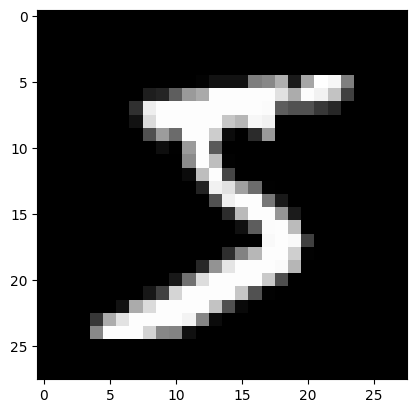

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")

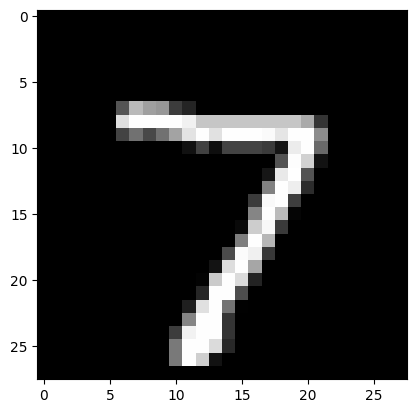

In [8]:
plt.imshow(x_test[0],cmap="gray")

### **Displaying first 9 images from train data**


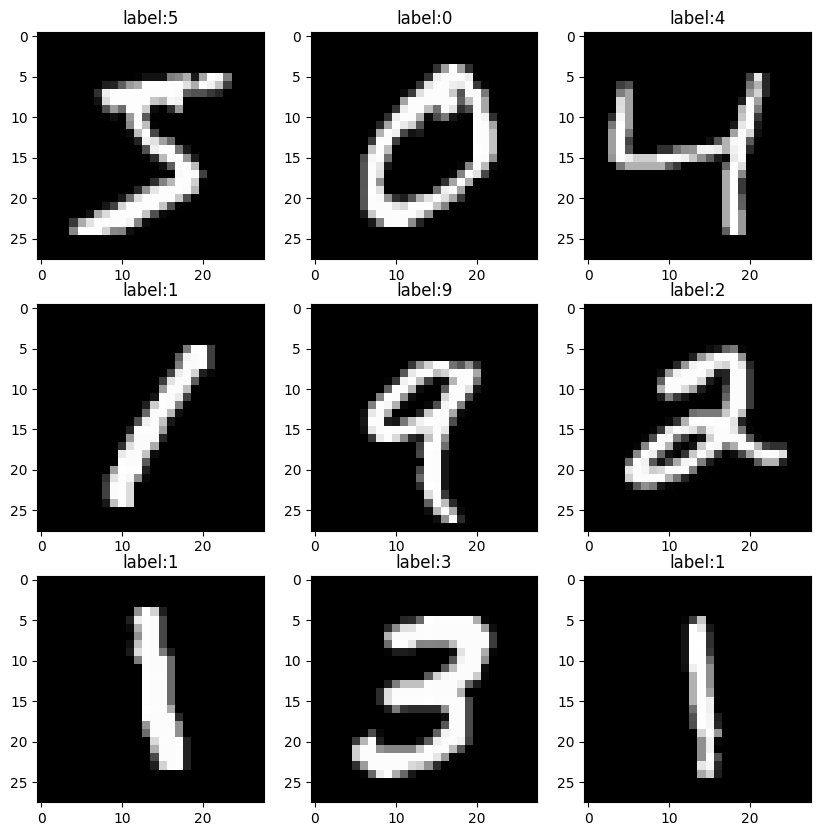

In [9]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i],cmap="gray")
  plt.title(f"label:{y_train[i]}")


In [10]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
len(np.unique(y_train))

10

### **This is a multiclass classification problem**
####Preprocess image data
### Pixel value 0-255

In [12]:
x_train_scaled=x_train.astype("float32")/255
x_test_scaled=x_test.astype("float32")/255

In [13]:
x_train_scaled[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### **one hot encode the y features**


In [14]:
from keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [15]:
y_train[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
y_test_encoded[0:5]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
x_train.shape

(60000, 28, 28)


### **Build the neural network**



In [18]:
from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [19]:
model = Sequential()

#added input layer
model.add(Input(shape=(28,28,1)))

# Add Convolution layer
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))

#Add Max Pooling1
model.add(MaxPooling2D(pool_size=(2,2)))

# Add concolution layer
model.add(Conv2D(filters=64, kernel_size = (3,3),activation= 'relu'))

# MAx pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Add Dropout layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(y_train_encoded.shape[1],activation = 'softmax'))


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [22]:
hist = model.fit(x_train_scaled,y_train_encoded,validation_split=0.1,epochs=15)

Epoch 1/15
1688/1688 [==============================] - 12s 5ms/step - loss: 0.2270 - accuracy: 0.9305 - val_loss: 0.0586 - val_accuracy: 0.9830
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0841 - accuracy: 0.9740 - val_loss: 0.0404 - val_accuracy: 0.9885
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0340 - val_accuracy: 0.9912
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0504 - accuracy: 0.9843 - val_loss: 0.0301 - val_accuracy: 0.9913
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0323 - val_accuracy: 0.9917
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9861 - val_loss: 0.0323 - val_accuracy

### **Plot the learning curve**


<function matplotlib.pyplot.show(close=None, block=None)>

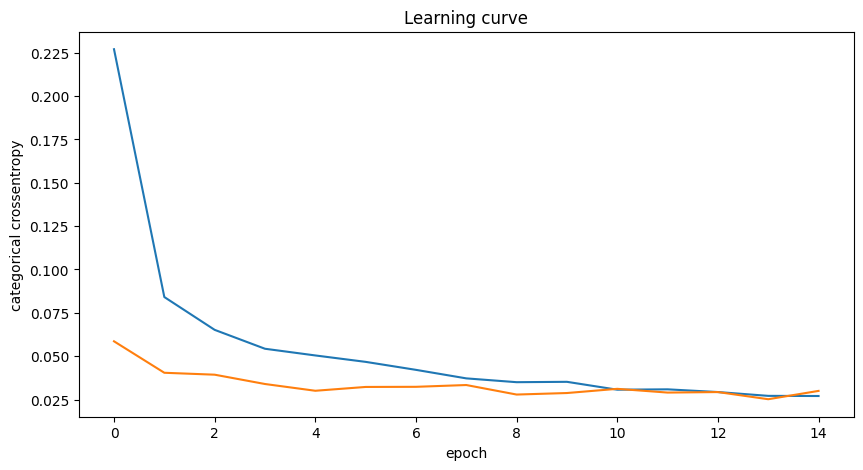

In [23]:
plt.figure(figsize = (10,5))
plt.plot(hist.history['loss'],label = 'Train loss')
plt.plot(hist.history['val_loss'],label = 'Validation loss')
plt.title('Learning curve')
plt.ylabel('categorical crossentropy')
plt.xlabel('epoch')
plt.show

### **Evaluate the model in train and test**

In [24]:
model.evaluate(x_train_scaled, y_train_encoded)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0112 - accuracy: 0.9967


[0.011241250671446323, 0.996666669845581]

In [25]:
model.evaluate(x_test_scaled, y_test_encoded)



313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9925


[0.02334469184279442, 0.9925000071525574]

### Predict results for train and test


In [26]:
yprob_train = model.predict(x_train_scaled)
yprob_test = model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [28]:
yprob_train[0:5]

array([[6.61588406e-12, 1.04963043e-11, 2.68846074e-11, 9.59670215e-05,
        1.35126090e-14, 9.99903560e-01, 2.70319466e-13, 2.87110535e-09,
        1.49912225e-07, 3.79463671e-07],
       [9.99999642e-01, 1.00561541e-15, 2.22735210e-07, 1.59707178e-11,
        6.86572743e-11, 2.61711399e-11, 2.23273187e-08, 8.42794497e-12,
        1.16772254e-08, 4.97229387e-08],
       [4.53613989e-16, 6.31193871e-08, 5.25438287e-12, 1.00526401e-12,
        9.99995828e-01, 1.66091359e-11, 3.11357017e-12, 7.20737390e-08,
        2.66804506e-07, 3.66996733e-06],
       [8.81332368e-11, 9.99993086e-01, 2.95281346e-08, 2.61187946e-12,
        5.14817793e-06, 1.90503099e-10, 1.20203234e-08, 1.66447489e-06,
        1.65096040e-07, 4.42387771e-09],
       [4.88359743e-12, 5.78738515e-11, 1.27844091e-09, 1.34512375e-08,
        1.94635631e-05, 1.94543284e-10, 7.01747349e-14, 2.55532677e-06,
        4.62197647e-07, 9.99977469e-01]], dtype=float32)

In [27]:
yprob_test[0:5]


array([[8.0731054e-11, 2.5892519e-12, 3.0429069e-07, 5.2743695e-07,
        2.1388836e-14, 5.1805608e-12, 3.0728845e-19, 9.9999905e-01,
        1.0942973e-10, 6.2222021e-08],
       [2.5254083e-06, 1.2952015e-05, 9.9997985e-01, 9.4230057e-10,
        3.1423636e-10, 5.9166083e-13, 4.5497986e-06, 1.2586612e-10,
        6.0246933e-08, 1.7629304e-11],
       [2.6814799e-08, 9.9994946e-01, 8.9670138e-08, 2.8148863e-09,
        3.6965466e-05, 7.1568493e-08, 1.8346570e-07, 1.2590956e-05,
        4.8301155e-07, 9.8329849e-08],
       [9.9996352e-01, 6.2559949e-14, 1.0141783e-06, 3.3256622e-09,
        2.6851144e-09, 3.5098938e-07, 3.3091823e-05, 8.5991653e-10,
        6.8994410e-07, 1.1876568e-06],
       [3.6674405e-10, 4.8718156e-12, 2.0271840e-11, 4.4831304e-12,
        9.9999964e-01, 1.6877871e-11, 1.8094105e-09, 2.6368203e-11,
        3.8453333e-08, 2.6422026e-07]], dtype=float32)

In [29]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [30]:
ypred_train[0:5]


array([5, 0, 4, 1, 9])

In [32]:
y_train[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [33]:
ypred_test[0:5]


array([7, 2, 1, 0, 4])

In [34]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion Matrix


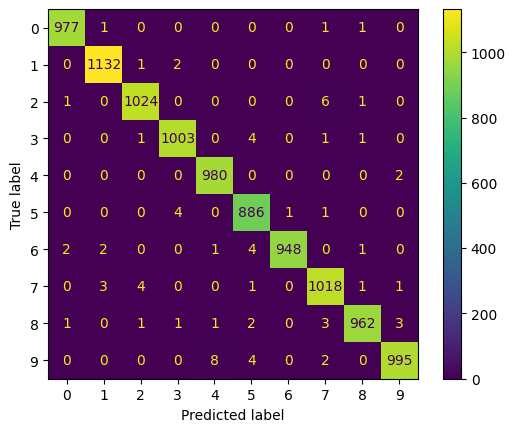

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save above model for future use


In [59]:
model.save('digitmodel_result.keras')


In [62]:
from keras.models import load_model
nn = load_model("/content/digitmodel_result.keras")
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [64]:
# Loading the image
import cv2
img = cv2.imread('/example_img.jpg', cv2.IMREAD_GRAYSCALE)
img


array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [65]:
img_scl = img.astype('float32')/255

In [66]:
probs = model.predict(np.array([img_scl]))


1/1 [==============================] - 0s 183ms/step


In [67]:
probs


array([[3.6494546e-20, 7.3877610e-18, 3.7269019e-13, 9.9999785e-01,
        6.3329386e-18, 2.1831190e-06, 8.8355562e-17, 1.0107180e-13,
        1.4864521e-12, 1.3317365e-11]], dtype=float32)

In [68]:
pred = np.argmax(probs)
pred

3

In [69]:
prob = np.max(probs)
prob

0.99999785

In [70]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob

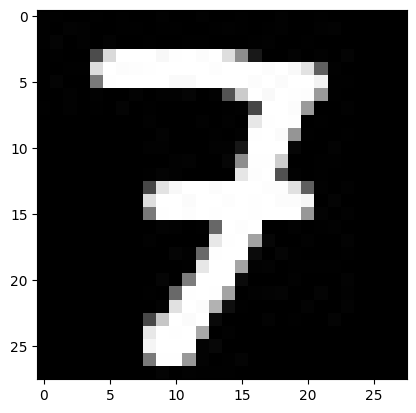

1/1 [==============================] - 0s 35ms/step


(7, 0.99645066)

In [71]:
predict_number('/example_img2.jpg')


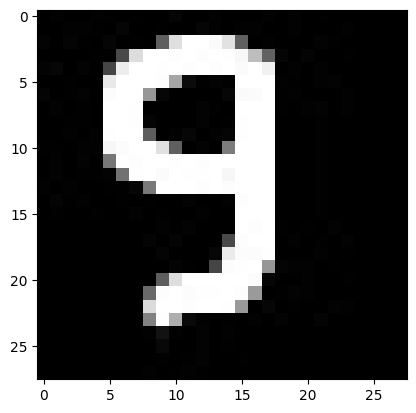

1/1 [==============================] - 0s 30ms/step


(4, 0.97654516)

In [72]:
predict_number('/example_img3.jpg')
